## Laboratorio 2 – Proyecto de Predicción de Bicicletas

**Maryorie Viluce**

### **Data:**

Primero debemos adquirir el dataset.  Nuestro dataset a descargar está en la siguiente dirección:
- https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

### Descargar los datos

Haremos una función para descargar los datos de la web, esto es muy útil para futuro.

In [2]:
import os
from six.moves import urllib

DS_EXTRACT_PATH = "ArtificialIntelligence/Laboratorios/Bike-Sharing-Dataset.zip"
DS_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"


def download_dataset(dataset_url=DS_URL, dataset_pc_path=DS_EXTRACT_PATH):
    if not os.path.isdir(dataset_pc_path):
        os.makedirs(dataset_pc_path)
    parts = os.path.split(dataset_url)
    zipname = parts[-1]
    zip_path = os.path.join(dataset_pc_path, zipname)
    urllib.request.urlretrieve(dataset_url, zip_path)

In [3]:
# Salida Esperada:
# Dataset en formato zip descargado en: <esta_carpeta>/datasets/capitalbikeshare/<nombre_del_zip>
download_dataset()

### Descomprimir los datos

Haremos una función para descomprimir el dataset en esta carpeta y finalmente borraremos el zip file.

In [4]:
from zipfile import ZipFile
import numpy as np
def unzip_dataset(dataset_pc_path=DS_EXTRACT_PATH):

    zip_files = [f for f in os.listdir(dataset_pc_path) if f.endswith(".zip")]
    
    for zip_file in zip_files:
        zip_path = os.path.join(dataset_pc_path, zip_file)
        
 
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_pc_path)
        
       
        os.remove(zip_path)


In [5]:
unzip_dataset()
## Salida Esperada:
# Dataset en formato csv descomprimodo en: <esta_carpeta>/datasets/capitalbikeshare/
# archivos: hour.csv, day.csv, Readme.txt

### Cargar y explorar el dataset

Ahora cargue el dataset y explore las diferentes variables del dataset:
- hour.csv

Cargar el dataset con pandas

In [6]:
import pandas as pd
import os

def load_bike_hourly_data(bike_dataset_path=DS_EXTRACT_PATH):
    csv_path = os.path.join(bike_dataset_path, "hour.csv")
    return pd.read_csv(csv_path)


Explorar las primeras 48 filas

In [7]:
bikeshare = load_bike_hourly_data()
bikeshare.head(48)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Desplegar información del dataset

Despliegue información escencial del dataset

In [8]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Visualizando el dataset
El dataset, como observó, tiene el número de personas para cada hora del día desde Enero del 2011 hasta Diciembre 2017. El número de personas que manejan se divide entre casuales y registrados sumados en la columna 'cnt'.

- Grafique el número de manejadores de bicicleta de los primeros 10 días del dataset.  Observe el dataset y note que el día se divide en 24 horas.  Puede ver la cantidad de rentas por horas allí.

El dataset es difícil de analizar normalmente, tiene altibajos, en especial cuando las personas van del trabajo a la casa y los fines de semana.  De las columnas anteriores también tenemos velocidad de viento, humedad, temperatura.  Todo esto afecta el alquiler de las bicicletas.  Trataremos de capturar estas características con un modelo.

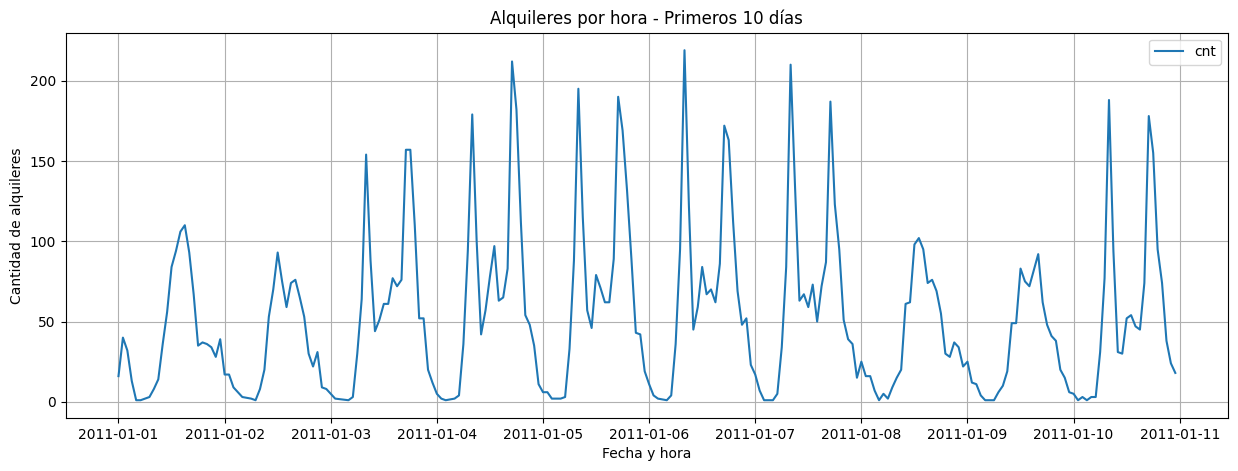

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
bikeshare['datetime'] = pd.to_datetime(bikeshare['dteday']) + pd.to_timedelta(bikeshare['hr'], unit='h')
primeros_10_dias = bikeshare[bikeshare['datetime'] < '2011-01-11']
plt.figure(figsize=(15, 5))
plt.plot(primeros_10_dias['datetime'], primeros_10_dias['cnt'], label='cnt')
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de alquileres')
plt.title('Alquileres por hora - Primeros 10 días')
plt.legend()
plt.grid(True)
plt.show()


### Gane más información de la distribución del dataset

Simplemente grafique con hist() para verificar/validar la distribución de los datos y ganar más información del dataset

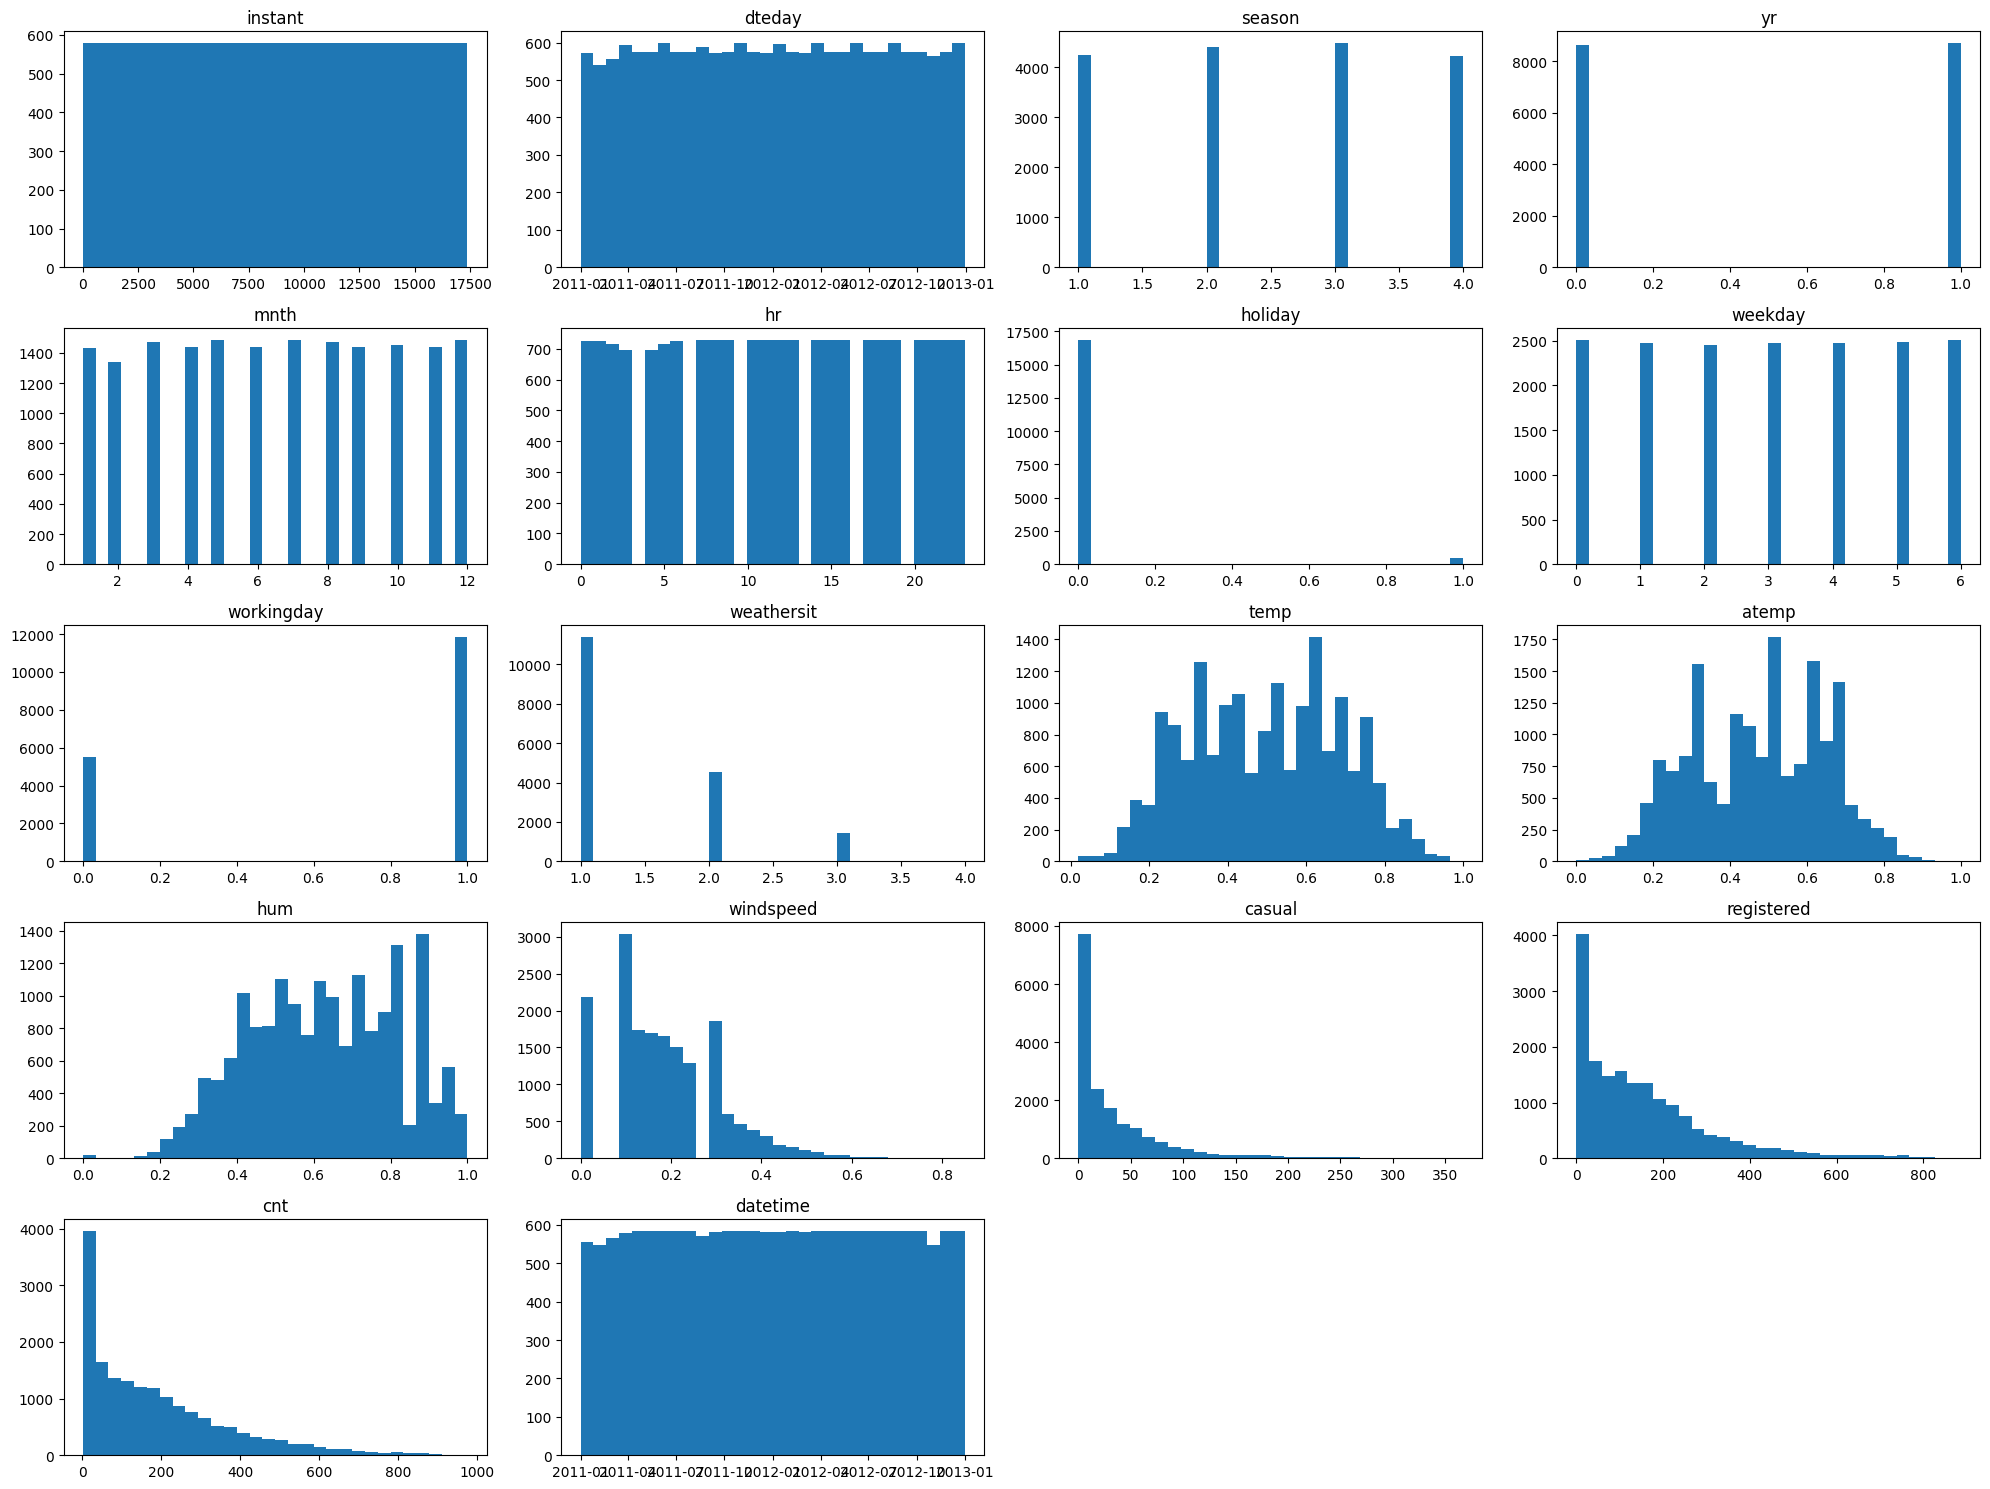

In [12]:
import matplotlib.pyplot as plt

bikeshare.hist(figsize=(20, 15), bins=30, grid=False)
plt.tight_layout()
plt.show()

### Variables Dummy - Transformación de Data Categórica

Los datos categóricos como temporada, mes, y año deben ser transformados a números debido a que los modelos solo trabajan con esto.  También tendremos variables binarias.  La acción la realizaremos com pandas y la función:
 - get_dummies()
 - columnas dummy = 'season', 'weathersit', 'mnth', 'hr', 'weekday'
 - columnas a borrar = 'instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr'

In [15]:
import pandas as pd

dummy_cols = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

for each in dummy_cols:
    dummies = pd.get_dummies(bikeshare[each], prefix=each, drop_first=False)
    bikeshare = pd.concat([bikeshare, dummies], axis=1)

drop_cols = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = bikeshare.drop(drop_cols, axis=1)

data.head()


,yr,holiday,temp,hum,windspeed,casual,registered,cnt,datetime,season_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,2011-01-01 00:00:00,True,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0.22,0.80,0.0,8,32,40,2011-01-01 01:00:00,True,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0.22,0.80,0.0,5,27,32,2011-01-01 02:00:00,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0.24,0.75,0.0,3,10,13,2011-01-01 03:00:00,True,...,False,False,False,False,False,False,False,False,False,True
4,0,0,0.24,0.75,0.0,0,1,1,2011-01-01 04:00:00,True,...,False,False,False,False,False,False,False,False,False,True


### Escalar el Dataset
- variables a escalar = 'casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed'

In [19]:
to_scale = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}

for each in to_scale:
    mean = data[each].mean()
    std = data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = ((data[each] - mean) / std).astype(float)


### Separación del Dataset
Separar el dataset en Training y Test
- 20% test set
- Campos de Test = 'cnt', 'casual', 'registered'
- Campos de Train = todos los demas

In [20]:
from sklearn.model_selection import train_test_split

target_fields = ['cnt', 'casual', 'registered']
X = data.drop(columns=target_fields)  # Entradas
y = data[target_fields]               # Salidas

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Entrenamiento

Entrenar el modelo basado en el regresor KNeighobrsRegressor
- n_neighbors = 4
- n_jobs = 4

In [29]:
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import pickle 

features = [
    'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
    'weathersit', 'temp', 'atemp', 'hum', 'windspeed'
]
target = 'cnt'

X = bikeshare[features]
y = bikeshare[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos divididos en conjuntos de entrenamiento y prueba.")

scaler_X = StandardScaler() 
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
print("Características (X) escaladas.")

scaler_y = MinMaxScaler() 
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)) 
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
print("Variable objetivo (Y) escalada.")

n_neighbors = 4
n_jobs = 4

knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=n_jobs)

print("\nEntrenando el modelo KNeighborsRegressor...")
knn_regressor.fit(X_train_scaled, y_train_scaled.ravel()) 

print("Modelo entrenado exitosamente.")


Datos divididos en conjuntos de entrenamiento y prueba.
Características (X) escaladas.
Variable objetivo (Y) escalada.

Entrenando el modelo KNeighborsRegressor...
Modelo entrenado exitosamente.


### Guardar el Modelo 

Una parte importante es que luego de entrenar podríamos guardar el modelo.  Este paso se realiza luego de haber evaluado varios y validar que cumple con las métricas.  A manera de prueba lo realizaremos antes, sin embargo recordar que es parte de los últimos pasos.

In [30]:

scaler_X_filename = 'scaler_X_bikeshare_model.pkl'
try:
    with open(scaler_X_filename, 'wb') as file:
        pickle.dump(scaler_X, file)
    print(f"Scaler de características (X) guardado exitosamente como '{scaler_X_filename}'")
except Exception as e:
    print(f"Error al guardar el scaler de características (X): {e}")

scaler_y_filename = 'scaler_y_bikeshare_model.pkl'
try:
    with open(scaler_y_filename, 'wb') as file:
        pickle.dump(scaler_y, file)
    print(f"Scaler de la variable objetivo (Y) guardado exitosamente como '{scaler_y_filename}'")
except Exception as e:
    print(f"Error al guardar el scaler de la variable objetivo (Y): {e}")

model_filename = 'knn_modelojalal.pkl' 
try:
    with open(model_filename, 'wb') as file:
        pickle.dump(knn_regressor, file)
    print(f"Modelo guardado exitosamente como '{model_filename}'")
except Exception as e:
    print(f"Error al guardar el modelo: {e}")


Scaler de características (X) guardado exitosamente como 'scaler_X_bikeshare_model.pkl'
Scaler de la variable objetivo (Y) guardado exitosamente como 'scaler_y_bikeshare_model.pkl'
Modelo guardado exitosamente como 'knn_modelojalal.pkl'


### Cargar el Modelo

Cuando poseemos la aplicación final, por ejemplo una aplicación por celular o una aplicación web, podemos 'consumir' el modelo llamandolo para realizar nuestras predicciones.  Para esto el modelo debe estar disponible desde una ubicación conocida en la máquina o dispositivo a ejecutar.

In [31]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

model_filename = 'knn_modelojalal.pkl'
scaler_X_filename = 'scaler_X_bikeshare_model.pkl'
scaler_y_filename = 'scaler_y_bikeshare_model.pkl'

loaded_model = None
loaded_scaler_X = None
loaded_scaler_y = None

try:
    with open(model_filename, 'rb') as file:
        loaded_model = pickle.load(file)
    print(f"Modelo '{model_filename}' cargado exitosamente.")

    with open(scaler_X_filename, 'rb') as file:
        loaded_scaler_X = pickle.load(file)
    print(f"Scaler de características (X) '{scaler_X_filename}' cargado exitosamente.")

    with open(scaler_y_filename, 'rb') as file:
        loaded_scaler_y = pickle.load(file)
    print(f"Scaler de la variable objetivo (Y) '{scaler_y_filename}' cargado exitosamente.")

except FileNotFoundError:
    print(f"Error: Uno o más archivos no se encontraron. Asegúrate de que '{model_filename}', '{scaler_X_filename}' y '{scaler_y_filename}' existan en la ruta correcta.")
except Exception as e:
    print(f"Error al cargar el modelo o los escaladores: {e}")

if loaded_model is not None and loaded_scaler_X is not None and loaded_scaler_y is not None:
    print("\nTodos los componentes (modelo y escaladores) están listos para ser utilizados.")


    print("\nDemostración de predicción con el modelo cargado:")

    new_data_point = pd.DataFrame([[1, 0, 1, 8, 0, 1, 1, 2, 0.24, 0.2879, 0.81, 0.0]],
                                  columns=[
                                      'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
                                      'weathersit', 'temp', 'atemp', 'hum', 'windspeed'
                                  ])

    new_data_point_scaled = loaded_scaler_X.transform(new_data_point)

    predicted_demand_scaled = loaded_model.predict(new_data_point_scaled)

    predicted_demand_actual = loaded_scaler_y.inverse_transform(predicted_demand_scaled.reshape(-1, 1))

    print(f"Datos de entrada para la predicción:\n{new_data_point}")
    print(f"Demanda de bicicletas predicha (escalada): {predicted_demand_scaled[0]:.4f}")
    print(f"Demanda de bicicletas predicha (valor real): {predicted_demand_actual[0][0]:.2f}")



Modelo 'knn_modelojalal.pkl' cargado exitosamente.
Scaler de características (X) 'scaler_X_bikeshare_model.pkl' cargado exitosamente.
Scaler de la variable objetivo (Y) 'scaler_y_bikeshare_model.pkl' cargado exitosamente.

Todos los componentes (modelo y escaladores) están listos para ser utilizados.

Demostración de predicción con el modelo cargado:
Datos de entrada para la predicción:
   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   8        0        1           1           2  0.24   

    atemp   hum  windspeed  
0  0.2879  0.81        0.0  
Demanda de bicicletas predicha (escalada): 0.0962
Demanda de bicicletas predicha (valor real): 94.75


### Realizar predicciones

Realizar las predicciones con el modelo de los datos de test

In [32]:

print("Realizando predicciones con el modelo entrenado sobre los datos de prueba...")
y_pred_scaled = knn_regressor.predict(X_test_scaled)
print("Predicciones realizadas exitosamente.")


Realizando predicciones con el modelo entrenado sobre los datos de prueba...
Predicciones realizadas exitosamente.


### Evaluar el modelo por medio de métricas

Evaluar el modelo por medio de las métricas de error medio cuadrado

In [33]:

# El MSE se calcula usando los valores ESCALADOS
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f"\nEl Error Cuadrático Medio (MSE) del modelo (con Y escalada) es: {mse}")

# Opcional: Calcular el Root Mean Squared Error (RMSE)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE) del modelo (con Y escalada) es: {rmse}")



El Error Cuadrático Medio (MSE) del modelo (con Y escalada) es: 0.011790614462352534
Root Mean Squared Error (RMSE) del modelo (con Y escalada) es: 0.10858459587967592


### Graficar los resultados

Graficar los resultados de la predicción vs los resultados de las pruebas

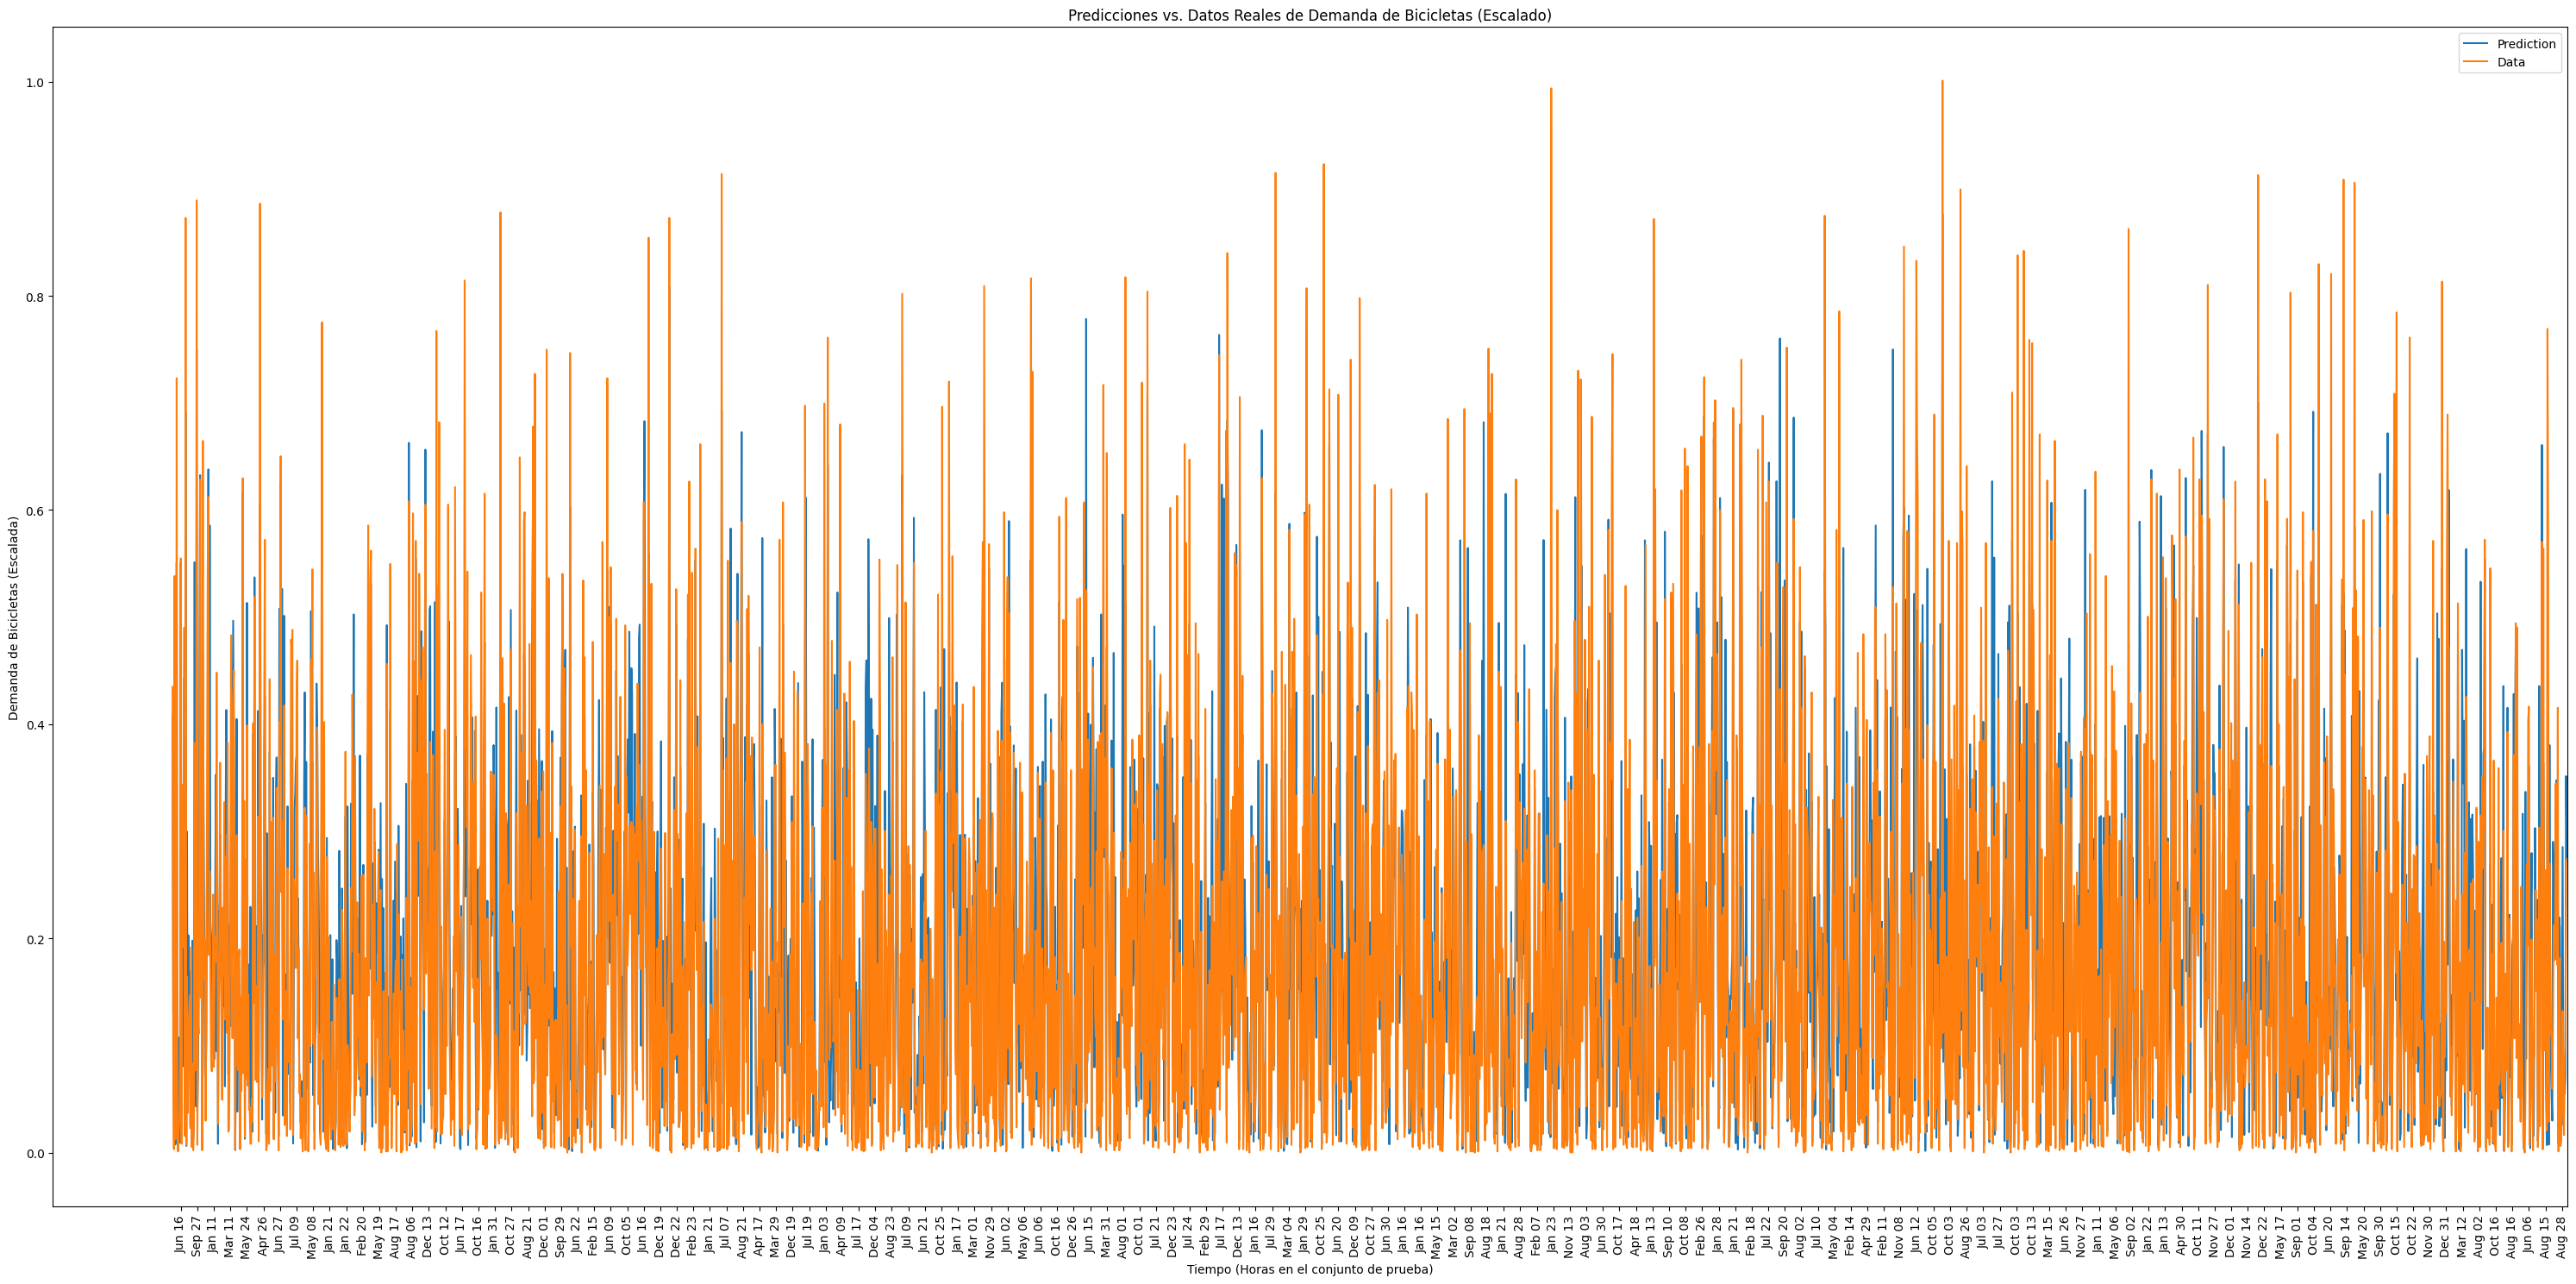

In [36]:
import matplotlib.pyplot as pyplot 
import numpy as np 
import pandas as pd 

fig, ax = pyplot.subplots(figsize=(30,15)) 


ax.plot(y_pred_scaled, label='Prediction') 
ax.plot(y_test_scaled, label='Data') 

ax.set_xlim(right=len(y_pred_scaled))
ax.legend()
dates = pd.to_datetime(bikeshare.loc[y_test.index]['dteday'])

dates = dates.apply(lambda d: d.strftime('%b %d'))

ax.set_xticks(np.arange(len(dates))[12::24])

_ = ax.set_xticklabels(dates[12::24], rotation=90)

ax.set_xlabel('Tiempo (Horas en el conjunto de prueba)')
ax.set_ylabel('Demanda de Bicicletas (Escalada)')
ax.set_title('Predicciones vs. Datos Reales de Demanda de Bicicletas (Escalado)')

pyplot.tight_layout() 
pyplot.show() 